In [126]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [127]:
# Carregar o arquivo csv como um DataFrame
df = pd.read_csv('basic-analitycs.csv')

In [128]:
# Análise exploratória dos dados
print("Informações básicas sobre o DataFrame:")
print(df.info())
print("\nAmostra dos dados:")
print(df.head())


Informações básicas sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  125000 non-null  object
 1   trans_date   125000 non-null  object
 2   tran_amount  125000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ MB
None

Amostra dos dados:
  customer_id  trans_date  tran_amount
0      CS5295   11-Feb-13           35
1      CS4768  15-mar.-15           39
2      CS2122   26-Feb-13           52
3      CS1217  16-nov.-11           99
4      CS1850  20-nov.-13           78


In [129]:
# Calcular o número total de transações no conjunto de dados
total_transacoes = df.shape[0]
# Exibir o número total de transações
print("\nNúmero total de transações:", total_transacoes)


Número total de transações: 125000


In [130]:
# Calcula a média e o desvio padrão das transações no conjunto de dados
media_transacoes = round(df['tran_amount'].mean(), 2)
desvio_padrao_transacoes = round(df['tran_amount'].std(), 2)
# Exibir a média e o desvio
print("\nMédia das transações:", media_transacoes)
print("Desvio padrão das transações:", desvio_padrao_transacoes)


Média das transações: 64.99
Desvio padrão das transações: 22.86


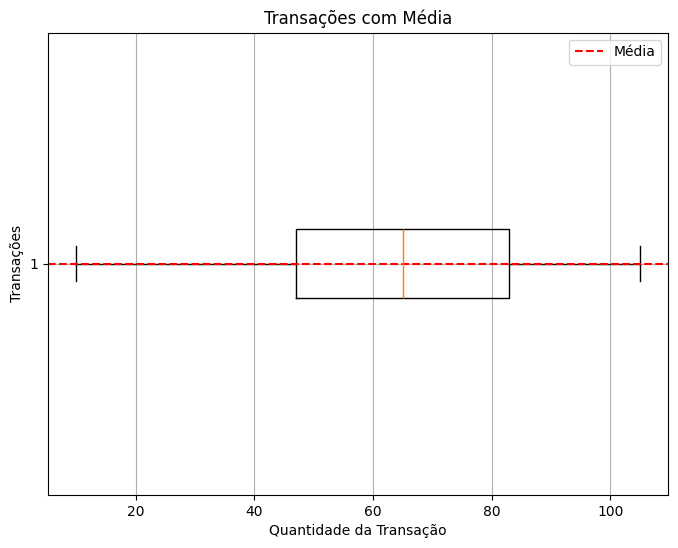

In [131]:
# Cria o gráfico boxplot na horizontal
plt.figure(figsize=(8, 6))
plt.boxplot(df['tran_amount'], vert=False)
plt.axhline(y=1, color='red', linestyle='--', label='Média')
plt.xlabel('Quantidade da Transação')
plt.ylabel('Transações')
plt.legend()
plt.title('Transações com Média')
plt.grid(True)
plt.show()

In [132]:
# Calcular mediana e moda das transações
mediana_transacoes = df['tran_amount'].median()
moda_transacoes = df['tran_amount'].mode()[0]

# Exibir mediana e moda
print("Mediana das transações:", mediana_transacoes)
print("Moda das transações:", moda_transacoes)

Mediana das transações: 65.0
Moda das transações: 49


In [134]:
# Os 10 clientes com a maior quantidade de transações
top_10_clientes = df['customer_id'].value_counts().nlargest(10)
print("\nTop 10 clientes com maior quantidade de transações:")
print(top_10_clientes)


Top 10 clientes com maior quantidade de transações:
customer_id
CS4424    39
CS4320    38
CS3799    36
CS1215    35
CS5109    35
CS3805    35
CS2620    35
CS3013    35
CS4074    34
CS4998    34
Name: count, dtype: int64
